In [1]:
# Importing warning library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Numpy and pandas libraries
import numpy as np
import pandas as pd

In [3]:
# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importing machine learning modelling libraries
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [5]:
# Reading the data into dataframe
rental_bikes_dataframe = pd.read_csv(r'day.csv')

In [6]:
# analyzing the dataframe
rental_bikes_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# checking the shape of the dataframe
rental_bikes_dataframe.shape

(730, 16)

In [8]:
# checking the info of the dataframe
rental_bikes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# checking statistical summary of the dataframe
rental_bikes_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# checking the columns of the dataframe
rental_bikes_dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Performing basic EDA steps

###### 1) checking for the missing values count

In [11]:
rental_bikes_dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above result we can see that there are no null values in the dataframe.

In [12]:
# analyzing the dataframe
rental_bikes_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the dataframe we can see that there are some categorical columns which have been encoded into numerical variables.

In [13]:
# identifying categorical and numerical columns
categorical_columns_list = ['season', 'yr', 'mnth','holiday', 'weekday','workingday', 'weathersit' ]
numerical_columns_list = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

###### 2) checking for the outliers

In [14]:
# statistical analysis of temp column
rental_bikes_dataframe['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

From the above statistical summary we can see that both mean and median are very close to each other and also the variation in the quantiles is uniform. It is an indication that there are no outliers in the column. But let's analyze further more using box plot

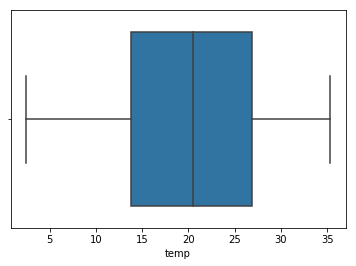

In [15]:
# checking for outliers using boxplot
sns.boxplot(rental_bikes_dataframe['temp'])

From boxplot we can clearly infer that there are no outliers in temp column.

Similarly checking for boxplots for other numerical variables:

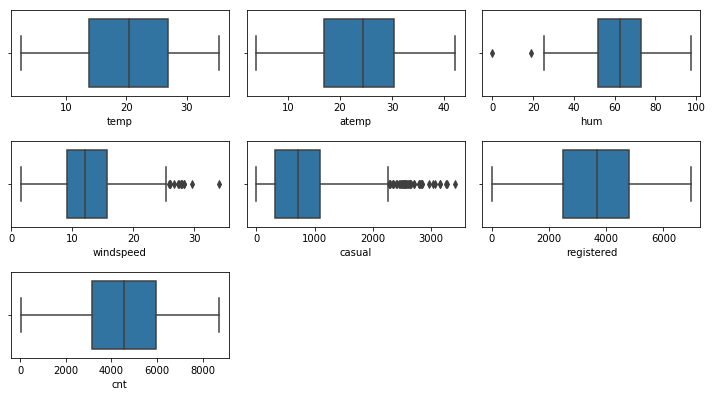

In [16]:
plt.figure(figsize = (10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(4,3,index+1)
    sns.boxplot(rental_bikes_dataframe[column_name])
    plt.tight_layout()
plt.show()

- from the above subplots of boxplots we can see that there are some outliers for windspeed,casual and humidity columns for rest other columns there are no outliers.
-  But the outliers in windspeed and casual column are not like sudden increase step in values meaning there is no huge gap between the whisker line and outliers. They are just continously increasing high values.
- Hence as per the nature of the columns windspeed and casual it is natural to have some high values. Hence such outliers can be taken into consideration.
- In case of outliers in humidity column the value are away form the main part of the distribution. But when scaling of values during modelling the such high values can be adjusted between 0 and 1 when performed using Normalization method.

##### Target variable for modelling: CNT
##### Rest all other variable become predictor variables

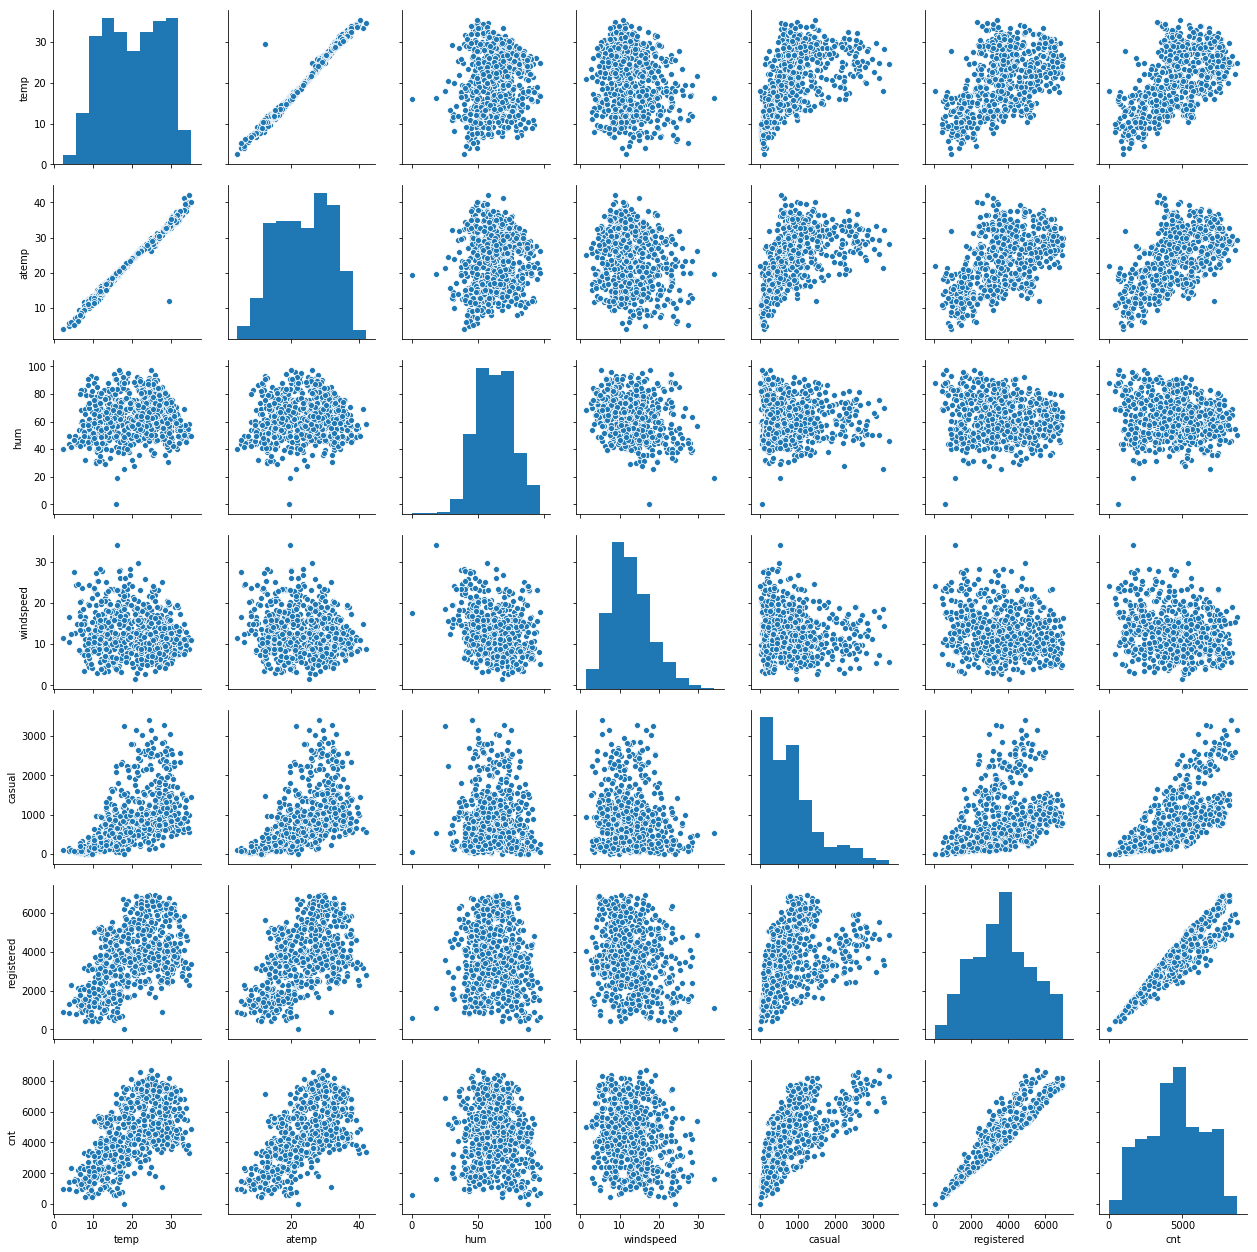

In [17]:
# Analyzing the numerical columns of the dataframe using pairplot
sns.pairplot(rental_bikes_dataframe[numerical_columns_list])

###### from the above visualization we can infer few observations:
- temp and atemp are highly correlated with each other
- Registered and cnt are highly correlated with each other
- cnt and casual are also slightly correlated with each other
- registered and casual are also slightly correlated with each other

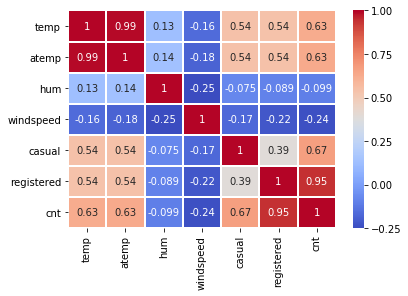

In [18]:
# analyzing using correlation matrix for numerical relation between the numerical columns
corr_matrix = rental_bikes_dataframe[numerical_columns_list].corr()
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm', linecolor= 'white', linewidths= 1)

###### from the above correlation matrix we can infer few observations:

__Good correlations between target and predictor variables:__
- cnt and registered are very strongly correlated with each other
- temp and cnt 
- atemp and cnt
- casual and cnt<br><br>
__Bad correlations between variables which may result in multicolinearity:__
- temp and atemp are strongest correlated with each other
- casual and temp
- casual and atemp
- registered and temp
- registered and atemp

In [19]:
categorical_columns_list

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

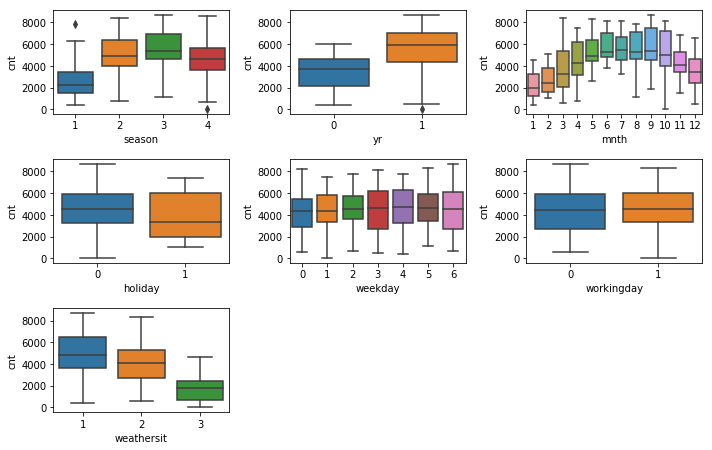

In [20]:
# variation of target variable with all categorical variables
plt.figure(figsize= (10,8))
for index, column_name in enumerate(categorical_columns_list):
    plt.subplot(4,3,index+1)
    sns.boxplot(data=rental_bikes_dataframe, x= column_name, y = 'cnt')
    plt.tight_layout()
plt.show()

__Inference__: From the above plots of categorical columns the following inference can be made:
- In variation with season the demand of bike is high in summer and spring which are season 2 and 3 when compared to other seasons.
- In year 2019 the demand of bikes have been increased when compared to 2018
- from 5th month to 9th month there has been slight increase in demand of bike
- There is no much variation in demand of bikes if it is a holiday or not
- Also no much variation in demand of bikes over a period of week
- Also no variation in demand of bikes even if it is an workingday or not
- There is some increase in demand of bikes when the weather sit is 1 compared to other weathersit

In [21]:
# analyzing the dataframe
rental_bikes_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


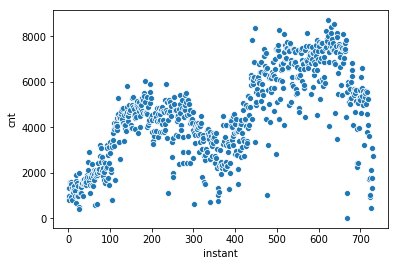

In [22]:
# visualizing the variation of cnt with instant
sns.scatterplot(x = rental_bikes_dataframe['instant'], y = rental_bikes_dataframe['cnt'])

__Inference__: from the above plot we can see that there has been steady increase in demand in bikes upto 200th day later there has been sudden decrease in demand. Again from  400th day the demand has been increased upto 600th day. Again there has been drastic decrease in demand of bikes.

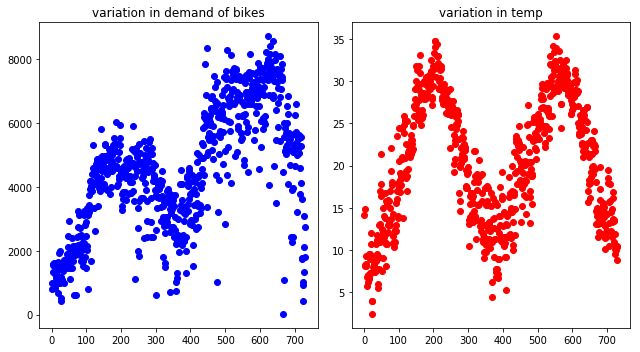

In [23]:
# visualizing variation between cnt/temp and instant
plt.figure(figsize= (9,5))
c = [i for i in range(1,rental_bikes_dataframe.shape[0]+1)]
plt.subplot(1,2,1)
plt.scatter(c,rental_bikes_dataframe['cnt'], color = 'blue')
plt.title('variation in demand of bikes')
plt.subplot(1,2,2)
plt.scatter(c, rental_bikes_dataframe['temp'],color = 'red')
plt.title('variation in temp')
plt.tight_layout()
plt.show()

__Inference__: from the above plot we can see that there is almost similar pattern in variation of demand of bikes and temp over period of days past.

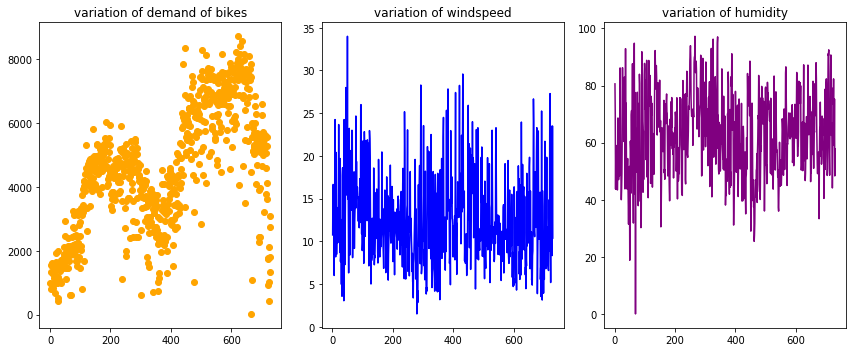

In [24]:
# analyzing the variation of cnt/windspeed/hum over instant
plt.figure(figsize= (12,5))
plt.subplot(1,3,1)
plt.scatter(rental_bikes_dataframe['instant'], rental_bikes_dataframe['cnt'], color = 'orange')
plt.title('variation of demand of bikes')
plt.subplot(1,3,2)
plt.plot(rental_bikes_dataframe['instant'], rental_bikes_dataframe['windspeed'], color = 'blue')
plt.title('variation of windspeed')
plt.subplot(1,3,3)
plt.plot(rental_bikes_dataframe['instant'], rental_bikes_dataframe['hum'], color = 'purple')
plt.title('variation of humidity')
plt.tight_layout()
plt.show()

__Inference__: from the above plots we can see that there is no much relational variation between demand of bikes and windspeed and hum.

## Data Preparation

In [25]:
# analyzing the dataframe
rental_bikes_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
# Dropping some of the colums which are not of use for model building
rental_bikes_dataframe.drop(['instant','dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [27]:
# analyzing the dataframe after dropping
rental_bikes_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


__Description of categorical columns__: 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week 0- Sun, 6- Sat
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [28]:
# converting season column into its respective categorical name
rental_bikes_dataframe.loc[rental_bikes_dataframe['season'] == 1, 'season'] = 'spring'
rental_bikes_dataframe.loc[rental_bikes_dataframe['season'] == 2, 'season'] = 'summer'
rental_bikes_dataframe.loc[rental_bikes_dataframe['season'] == 3, 'season'] = 'fall'
rental_bikes_dataframe.loc[rental_bikes_dataframe['season'] == 4, 'season'] = 'winter'

In [29]:
# converting yr column into 2018 and 2019
rental_bikes_dataframe.loc[rental_bikes_dataframe['yr'] == 0, 'yr'] = '2018'
rental_bikes_dataframe.loc[rental_bikes_dataframe['yr'] == 1, 'yr'] = '2019'

In [30]:
# converting month into categorical name
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 1, 'mnth'] = 'Jan'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 2, 'mnth'] = 'Feb'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 3, 'mnth'] = 'Mar'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 4, 'mnth'] = 'Apr'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 5, 'mnth'] = 'May'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 6, 'mnth'] = 'Jun'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 7, 'mnth'] = 'Jul'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 8, 'mnth'] = 'Aug'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 9, 'mnth'] = 'Sep'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 10, 'mnth'] = 'Oct'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 11, 'mnth'] = 'Nov'
rental_bikes_dataframe.loc[rental_bikes_dataframe['mnth'] == 12, 'mnth'] = 'Dec'

In [31]:
# converting weekday column into categorical column
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 0, 'weekday'] = 'Sunday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 1, 'weekday'] = 'Monday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 2, 'weekday'] = 'Tuesday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 3, 'weekday'] = 'Wednesday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 4, 'weekday'] = 'Thursday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 5, 'weekday'] = 'Friday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weekday']== 6, 'weekday'] = 'Saturday'

In [32]:
# converting weathersit into categorical names
rental_bikes_dataframe.loc[rental_bikes_dataframe['weathersit']== 1, 'weathersit'] = 'Clear'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weathersit']== 2, 'weathersit'] = 'Mist'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weathersit']== 3, 'weathersit'] = 'Light_Snow'
rental_bikes_dataframe.loc[rental_bikes_dataframe['weathersit']== 4, 'weathersit'] = 'Heavy_Rain'

In [33]:
# converting holiday into categorical names
rental_bikes_dataframe.loc[rental_bikes_dataframe['holiday'] == 0, 'holiday'] = 'not_holiday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['holiday'] == 1, 'holiday'] = 'is_holiday'

In [34]:
# converting workingday into categorical names
rental_bikes_dataframe.loc[rental_bikes_dataframe['workingday'] == 0, 'workingday'] = 'not_workingday'
rental_bikes_dataframe.loc[rental_bikes_dataframe['workingday'] == 1, 'workingday'] = 'is_workingday'

In [35]:
# analyzing the dataframe after conversion
rental_bikes_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,not_holiday,Saturday,not_workingday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,not_holiday,Sunday,not_workingday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,not_holiday,Monday,is_workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,not_holiday,Tuesday,is_workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,not_holiday,Wednesday,is_workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


###### creating dummy variables for categorical columns

In [36]:
# creating dummies for Season column
season_dummies = pd.get_dummies(rental_bikes_dataframe['season'], drop_first= True)

In [37]:
# creating dummeis for year column
year_dummies = pd.get_dummies(rental_bikes_dataframe['yr'], drop_first= True)

In [38]:
# creating dummies for holiday column
holiday_dummies = pd.get_dummies(rental_bikes_dataframe['holiday'], drop_first= True)

In [39]:
# creating dummies for month column
month_dummies = pd.get_dummies(rental_bikes_dataframe['mnth'], drop_first= True)

In [40]:
# creating dummies for weekday column
weekday_dummies = pd.get_dummies(rental_bikes_dataframe['weekday'], drop_first= True)

In [41]:
# creating dummies for workingday
workingday_dummies = pd.get_dummies(rental_bikes_dataframe['workingday'], drop_first= True)

In [42]:
# creating dummies for weathersit
weathersit_dummies = pd.get_dummies(rental_bikes_dataframe['weathersit'], drop_first= True)

In [43]:
# combing all dummies together
dummy_dataframe = pd.concat([season_dummies,year_dummies,holiday_dummies,month_dummies,weekday_dummies,workingday_dummies,weathersit_dummies], axis =1 )
dummy_dataframe.head()

,spring,summer,winter,2019,not_holiday,Aug,Dec,Feb,Jan,Jul,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
# analyzing the shape of the dummy dataframe
dummy_dataframe.shape

(730, 25)

In [45]:
# combining the dummy dataframe with rental_bikes_dataframe
rental_bikes_dataframe = pd.concat([rental_bikes_dataframe,dummy_dataframe], axis = 1)

In [46]:
# analyzing the dataframe after concatenation
rental_bikes_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
0,spring,2018,Jan,not_holiday,Saturday,not_workingday,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,1,0,1
1,spring,2018,Jan,not_holiday,Sunday,not_workingday,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,1,0,1
2,spring,2018,Jan,not_holiday,Monday,is_workingday,Clear,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,0,0,0
3,spring,2018,Jan,not_holiday,Tuesday,is_workingday,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,not_holiday,Wednesday,is_workingday,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# Dropping the categorical columns from which dummies have been formed
rental_bikes_dataframe.drop(categorical_columns_list, axis = 1, inplace = True)

In [48]:
# checking the dataframe after dropping columns
rental_bikes_dataframe.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [49]:
# checking the shape of the dataframe after dummyfication
rental_bikes_dataframe.shape

(730, 30)

In [50]:
# checking the columns and info of the dataframe after dummyfication
rental_bikes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            730 non-null    float64
 1   atemp           730 non-null    float64
 2   hum             730 non-null    float64
 3   windspeed       730 non-null    float64
 4   cnt             730 non-null    int64  
 5   spring          730 non-null    uint8  
 6   summer          730 non-null    uint8  
 7   winter          730 non-null    uint8  
 8   2019            730 non-null    uint8  
 9   not_holiday     730 non-null    uint8  
 10  Aug             730 non-null    uint8  
 11  Dec             730 non-null    uint8  
 12  Feb             730 non-null    uint8  
 13  Jan             730 non-null    uint8  
 14  Jul             730 non-null    uint8  
 15  Jun             730 non-null    uint8  
 16  Mar             730 non-null    uint8  
 17  May             730 non-null    uin

##### Dividing the dataframe into train and test datasets

In [51]:
df_train, df_test = train_test_split(rental_bikes_dataframe,train_size = 0.70, test_size = 0.30, random_state = 100)

In [52]:
# analyzing the train dataframe
df_train.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1


In [53]:
# analyzing the test dataframe
df_test.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


###### Scaling the train dataset

In [54]:
# reading the train dataset
df_train.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1


In [55]:
# checking the numerical columns
numerical_columns_list

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [56]:
# removing casual and registered from numerical list
numerical_columns_list.remove('casual')
numerical_columns_list.remove('registered')

In [57]:
# creating scaler object
scaler = MinMaxScaler()

# perform fit and tranform operation using scaler obejct on to the data
df_train[numerical_columns_list] = scaler.fit_transform(df_train[numerical_columns_list])

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
# analyzing the train dataframe after scaling
df_train.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1


In [59]:
# analyzing the statistical summary of df_train to check whether scaling is done
df_train.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.974510,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.323529,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.157763,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above statistical summary we can see that scaling has been done for the numerical columns in between 0 and 1.

##### Creating X and y variables

In [60]:
X_train = df_train[['temp', 'atemp', 'hum', 'windspeed','spring', 'summer','winter', '2019', 'not_holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul','Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'not_workingday','Light_Snow', 'Mist']]
y_train = df_train['cnt']

## Data Modelling

- Using mixed approach in creating the model meaning using automated feature selection like RFA and then using manual elimination of the variables from the top selected n feaures.

In [61]:
# Creating model using sklearn
lm = LinearRegression()

# fitting on to the linear model object
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
# using RFE for selection of top 15 features
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [63]:
# Checking the top 15 features automatically selected by rfe
rfe_output = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_output

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('not_holiday', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('not_workingday', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [64]:
# considering only the top 15 features from the above list
top_features_list = []
for i in rfe_output:
    if 1 in i:
        top_features_list.append(i[0])
top_features_list

['temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 '2019',
 'not_holiday',
 'Jan',
 'Jul',
 'Sep',
 'Saturday',
 'not_workingday',
 'Light_Snow',
 'Mist']

In [65]:
# Creating X_train after rfe selection of features
X_train_rfe = X_train[top_features_list]

# reading the X_train_rfe to verify
X_train_rfe.head()

,temp,hum,windspeed,spring,summer,winter,2019,not_holiday,Jan,Jul,Sep,Saturday,not_workingday,Light_Snow,Mist
653,0.509887,0.575354,0.300794,0,0,1,1,1,0,0,0,0,0,0,0
576,0.815169,0.725633,0.264686,0,0,0,1,1,0,1,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,1,0,0,0,1,1,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,1,0,0,0,1,1,0,1


##### Creating mlr_model_1

In [66]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_1 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_1 = mlr_model_1.fit()

#checking out the summary of the model
mlr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        12:45:02   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2360      0.044      5.411      0.000       0.150       0.322
temp               0.5098      0.034     14.851      0.000       0.442       0.577
hum               -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed         -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer             0.0497      0.015      3.346      0.001       0.020       0.079
winter             0.0944      0.017      5.479      0.000       0.061       0.128
2019               0.2305      0.008     28.807      0.000       0.215       0.246
not_holiday        0.0585      0.027      2.178      0.030       0.006       0.111
Jan               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                0.0812      0.016      4.934      0.000       0.049       0.114
Saturday           0.0537      0.014      3.707      0.000       0.025       0.082
not_workingday    -0.0435      0.012     -3.781      0.000      -0.066      -0.021
Light_Snow        -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist              -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Few Observations from the summary__: <br>1)All the coefficients are significant as their p values are less than significance level.<br>2)R sqaure and adjusted R sqaure are close each other.<br>3) The F statistics and p value of F-statistics are considerably high and close to 0 it indicates that ther overall model is significant.<br> 4) Some coefficients are positive and some are negative.<br><br> Let's check the coefficients VIF score to check whether there is any multicolinearity issues.

In [67]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = top_features_list

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
1,hum,33.740799
7,not_holiday,28.582121
0,temp,20.127108
3,spring,5.154452
2,windspeed,4.977067
5,winter,3.847609
4,summer,3.064009
12,not_workingday,2.626312
14,Mist,2.331008
6,2019,2.097047


__From the above VIF scores we can see that__: <br> Hum has the highest VIF score therefore it clearly indicates that VIF is strongly correlated with other features. So let's drop the hum predictor variable and rebuild the model.

In [68]:
# Dropping hum feature
X_train_rfe.drop('hum', axis = True, inplace = True)

###### Creating mlr_model_2

In [69]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_2 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_2 = mlr_model_2.fit()

#checking out the summary of the model
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          7.33e-189
Time:                        12:45:02   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1640      0.041      4.033      0.000       0.084       0.244
temp               0.4728      0.034     14.037      0.000       0.407       0.539
windspeed         -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer             0.0434      0.015      2.890      0.004       0.014       0.073
winter             0.0797      0.017      4.650      0.000       0.046       0.113
2019               0.2344      0.008     29.019      0.000       0.218       0.250
not_holiday        0.0562      0.027      2.058      0.040       0.003       0.110
Jan               -0.0389      0.018     -2.215      0.027      -0.073      -0.004
Jul               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sep                0.0753      0.017      4.522      0.000       0.043       0.108
Saturday           0.0584      0.015      3.980      0.000       0.030       0.087
not_workingday    -0.0465      0.012     -3.983      0.000      -0.069      -0.024
Light_Snow        -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist              -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary statistics we can see that there is no much change in R square and adjusted R square value.
- Also the F statistics value is considerably higher than 1.
- Also p value of F statistics is close to zero therefore it implies that the model is significant.
- The p values of indiviual features are also less than significance level hence the coefficients are significant.
- The coefficients magnitudes are positive and negative.<br><br>
Let's check again for the VIF scores.

In [70]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
6,not_holiday,24.791028
0,temp,13.918885
1,windspeed,4.819562
2,spring,4.453724
4,winter,3.010546
3,summer,2.818276
11,not_workingday,2.546215
5,2019,2.077336
10,Saturday,2.023170
7,Jan,1.649824


From the above VIF scores we can see that not_holiday is highly correlated with other predictor variables, lets drop not_holiday and again rebuild the model.

In [71]:
# Dropping not_holiday column
X_train_rfe.drop('not_holiday', axis = 1, inplace = True)

###### Creating mlr_model_3

In [72]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_3 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_3 = mlr_model_3.fit()

#checking out the summary of the model
mlr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.11e-189
Time:                        12:45:03   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2205      0.030      7.330      0.000       0.161       0.280
temp               0.4730      0.034     13.996      0.000       0.407       0.539
windspeed         -0.1572      0.025     -6.311      0.000      -0.206      -0.108
spring            -0.0605      0.021     -2.892      0.004      -0.102      -0.019
summer             0.0437      0.015      2.903      0.004       0.014       0.073
winter             0.0788      0.017      4.587      0.000       0.045       0.113
2019               0.2346      0.008     28.950      0.000       0.219       0.250
Jan               -0.0395      0.018     -2.240      0.026      -0.074      -0.005
Jul               -0.0472      0.018     -2.570      0.010      -0.083      -0.011
Sep                0.0734      0.017      4.399      0.000       0.041       0.106
Saturday           0.0669      0.014      4.728      0.000       0.039       0.095
not_workingday    -0.0548      0.011     -4.992      0.000      -0.076      -0.033
Light_Snow        -0.2906      0.024    -11.943      0.000      -0.338      -0.243
Mist              -0.0821      0.009     -9.505      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       74.009   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.357
Skew:                          -0.733   Prob(JB):                     7.61e-42
Kurtosis:                       5.600   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above again there is no much variation in R square and adjusted R square value.
- Model is significant
- p values of the coefficients are significant<br><br> Let's check for the VIF scores

In [73]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,5.220894
1,windspeed,4.639044
2,spring,2.796007
10,not_workingday,2.422492
3,summer,2.236221
5,2019,2.074248
9,Saturday,1.931962
4,winter,1.842821
6,Jan,1.609475
7,Jul,1.593774


- From the above VIF scores we can see that temp variable has slightly greater vif score than 5. But at the same time temp variable is the highest positive coefficient in relation with response variable which means that temp variable is strongly related to response varibale which is an good indication in modelling. Upon removal of temp variable there will be drastics decrease in R square and adjusted R square. Hence it is not better to remove temp variable.
- So lets remove the next higher vif score variable which is windspeed. Also the coefficient of windspeed is highly negative when compared to other negative coefficients. 
- As per business goal we need to model variables which will help in increase in demand of sales so accordingly let's drop windspeed and rebuild the model again.

In [74]:
# Dropping windspeed from X_train_rfe
X_train_rfe.drop('windspeed', axis = 1, inplace = True)

###### Creating mlr_model_4

In [75]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_4 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_4 = mlr_model_4.fit()

#checking out the summary of the model
mlr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.44e-182
Time:                        12:45:03   Log-Likelihood:                 489.30
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     497   BIC:                            -897.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1637      0.030      5.492      0.000       0.105       0.222
temp               0.4923      0.035     14.088      0.000       0.424       0.561
spring            -0.0725      0.022     -3.349      0.001      -0.115      -0.030
summer             0.0346      0.016      2.224      0.027       0.004       0.065
winter             0.0823      0.018      4.615      0.000       0.047       0.117
2019               0.2332      0.008     27.731      0.000       0.217       0.250
Jan               -0.0251      0.018     -1.382      0.168      -0.061       0.011
Jul               -0.0479      0.019     -2.515      0.012      -0.085      -0.010
Sep                0.0780      0.017      4.507      0.000       0.044       0.112
Saturday           0.0645      0.015      4.395      0.000       0.036       0.093
not_workingday    -0.0559      0.011     -4.902      0.000      -0.078      -0.033
Light_Snow        -0.3054      0.025    -12.146      0.000      -0.355      -0.256
Mist              -0.0806      0.009     -8.991      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       78.170   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.335
Skew:                          -0.744   Prob(JB):                     3.88e-48
Kurtosis:                       5.839   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above statistics we can see that there is no much decrease in R square and adjusted R square when compared to previous model. Also the values very close to each other.
- The overall model is significant as per F statistics and p value of F statistics.
- But the indiviual coefficient of Jan variable has become insignificant.<br><br> Let's check for the vif scores as well

In [76]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,4.413235
9,not_workingday,2.418950
4,2019,2.070648
1,spring,2.057298
2,summer,1.951175
8,Saturday,1.930353
3,winter,1.642344
5,Jan,1.603498
6,Jul,1.591917
11,Mist,1.559442


- From above Vif scores we can see that all the variables vif scores are less than 5 which means the variables are multicolinear with other predictor variables.
- Though the vif score of Jan is less, but it is an insignificant coefficient in modelling. <br><br> Hence it is better to remove Jan variable and rebuild the model again

In [77]:
# dropping Jan variable from X_train_rfe
X_train_rfe.drop('Jan', axis = 1, inplace = True)

###### Creating  mlr_model_5

In [78]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_5 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_5 = mlr_model_5.fit()

#checking out the summary of the model
mlr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          9.28e-183
Time:                        12:45:03   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     498   BIC:                            -901.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1547      0.029      5.314      0.000       0.098       0.212
temp               0.5043      0.034     14.886      0.000       0.438       0.571
spring            -0.0758      0.022     -3.521      0.000      -0.118      -0.034
summer             0.0369      0.015      2.386      0.017       0.007       0.067
winter             0.0862      0.018      4.893      0.000       0.052       0.121
2019               0.2328      0.008     27.673      0.000       0.216       0.249
Jul               -0.0490      0.019     -2.573      0.010      -0.086      -0.012
Sep                0.0782      0.017      4.511      0.000       0.044       0.112
Saturday           0.0644      0.015      4.383      0.000       0.036       0.093
not_workingday    -0.0558      0.011     -4.889      0.000      -0.078      -0.033
Light_Snow        -0.3041      0.025    -12.092      0.000      -0.353      -0.255
Mist              -0.0812      0.009     -9.064      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       76.444   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.462
Skew:                          -0.728   Prob(JB):                     4.44e-47
Kurtosis:                       5.816   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above statistics we can see that there is no change in R square and adjusted R square values and also the values are close to each other.
- The indiviual coefficients of the variables are significant.
- The overall model is also significant as per F statistics and p value of F statistics.<br><br> Let's check for the Vif scores

In [79]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,4.344323
8,not_workingday,2.418654
4,2019,2.065233
2,summer,1.946982
7,Saturday,1.930206
3,winter,1.641316
5,Jul,1.585356
10,Mist,1.547945
1,spring,1.471327
6,Sep,1.332647


- From above vif scores of variables we can see that all the variable are good as their values are less than 5 thereby indicating no multicolinearity issue.
- Let's do some trail and error check upon removing some less significant magnitude variable as they have small magnitude of relation with the response variable.<br><br> Therefore let's remove Jul variable and rebuild the model again in order to reduce the complexity of model.

In [80]:
# Dropping Jul variable from X_train_rfe
X_train_rfe.drop('Jul', axis = 1, inplace=  True)

###### Creating mlr_model_6

In [81]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_6 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_6 = mlr_model_6.fit()

#checking out the summary of the model
mlr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.55e-182
Time:                        12:45:03   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1469      0.029      5.045      0.000       0.090       0.204
temp               0.4918      0.034     14.587      0.000       0.426       0.558
spring            -0.0647      0.021     -3.049      0.002      -0.106      -0.023
summer             0.0516      0.014      3.567      0.000       0.023       0.080
winter             0.0984      0.017      5.758      0.000       0.065       0.132
2019               0.2333      0.008     27.587      0.000       0.217       0.250
Sep                0.0915      0.017      5.507      0.000       0.059       0.124
Saturday           0.0647      0.015      4.380      0.000       0.036       0.094
not_workingday    -0.0568      0.011     -4.948      0.000      -0.079      -0.034
Light_Snow        -0.3051      0.025    -12.064      0.000      -0.355      -0.255
Mist              -0.0800      0.009     -8.886      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       77.818   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.021
Skew:                          -0.753   Prob(JB):                     4.09e-46
Kurtosis:                       5.751   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above statistics we can see that there is no much variation in R square and adjusted R square value when compared to previous model. Also the values are very close to each other.
- The overall is model is significant as per F statistics and p value of F statistics.
- The indiviual coefficients are also significant.<br><br> Let's check for Vif scores

In [82]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,3.061337
7,not_workingday,2.414547
4,2019,2.064624
6,Saturday,1.930116
2,summer,1.637844
9,Mist,1.545605
3,winter,1.488553
1,spring,1.392962
5,Sep,1.223691
8,Light_Snow,1.067936


- From above score we can see that the scores of variable are good thus making them not multicolinear with other predictor variables.
- Let's further try reducing the complexity of the model.<br><br> Let's remove not_workingday and rebuild the model again. Also the variable has slightly high vif value when compared to other variables.

In [83]:
# Dropping not_workingday from X_train_rfe
X_train_rfe.drop('not_workingday', axis =  1, inplace= True)

###### Creating mlr_model_7

In [84]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_7 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_7 = mlr_model_7.fit()

#checking out the summary of the model
mlr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.42e-178
Time:                        12:45:03   Log-Likelihood:                 472.74
No. Observations:                 510   AIC:                            -925.5
Df Residuals:                     500   BIC:                            -883.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.030      4.546      0.000       0.077       0.193
temp           0.4929      0.034     14.287      0.000       0.425       0.561
spring        -0.0670      0.022     -3.090      0.002      -0.110      -0.024
summer         0.0515      0.015      3.478      0.001       0.022       0.081
winter         0.0944      0.017      5.407      0.000       0.060       0.129
2019           0.2339      0.009     27.031      0.000       0.217       0.251
Sep            0.0916      0.017      5.388      0.000       0.058       0.125
Saturday       0.0194      0.012      1.633      0.103      -0.004       0.043
Light_Snow    -0.2975      0.026    -11.518      0.000      -0.348      -0.247
Mist          -0.0768      0.009     -8.364      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       80.335   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.765
Skew:                          -0.817   Prob(JB):                     2.28e-42
Kurtosis:                       5.521   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above statistics we can see that again there is no much change in R square and adjusted R square value. Also the values are very close to each other.
- The overall model significant as per F statistics and p value of F statistics.
- The indiviual coefficient of Saturday has become insignificant.<br><br> Let's check for the vif scores.

In [85]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,2.951412
4,2019,2.064467
2,summer,1.628366
8,Mist,1.540351
3,winter,1.435049
1,spring,1.335630
5,Sep,1.223437
6,Saturday,1.178937
7,Light_Snow,1.064717


- From above scores we can see that all the variables has good vif scores.
- Though vif score of Saturday is less but it become an insignificant as per p value.<br><br> Let's remove Saturday and rebuild the model again.

In [86]:
# Dropping Saturday from X_train_rfe
X_train_rfe.drop('Saturday', axis = 1, inplace= True)

###### Creating mlr_model_8 (Final Model)

In [87]:
# adding constant to the X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# creating model object
mlr_model_8 = sm.OLS(y_train, X_train_rfe_sm)

# fitting on to the model object
mlr_model_8 = mlr_model_8.fit()

#checking out the summary of the model
mlr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.09e-179
Time:                        12:45:03   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.030      4.690      0.000       0.081       0.197
temp           0.4915      0.035     14.228      0.000       0.424       0.559
spring        -0.0673      0.022     -3.095      0.002      -0.110      -0.025
summer         0.0512      0.015      3.452      0.001       0.022       0.080
winter         0.0943      0.017      5.391      0.000       0.060       0.129
2019           0.2335      0.009     26.951      0.000       0.216       0.250
Sep            0.0915      0.017      5.373      0.000       0.058       0.125
Light_Snow    -0.2967      0.026    -11.471      0.000      -0.348      -0.246
Mist          -0.0767      0.009     -8.335      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       73.851   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.495
Skew:                          -0.749   Prob(JB):                     1.05e-39
Kurtosis:                       5.490   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above statistics we can see that there no much difference R square and adjusted R square value. Also the values are very close to each other.
- Also complexity of the model is being reduced without much decrease in predictive power of the model.
- Due to presence of high complexity in model there may be chance of overfitting issue. Which will cause drastics decrease of R square value on test data. Thus making the model irrealiable.
- Also as of now the overall model is significant as per F statistics and p value of F statistics
- Also the indiviual coefficients of the model are significant.<br><br> Let's check for vif scores.

In [88]:
# checking the vif scores of the X_train_rfe

# creaing VIF dataframe
vif = pd.DataFrame()

# adding features as as one column
vif['features'] = X_train_rfe.columns

# adding vif scores for each of the features as one column
vif['vif_score'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]

# sorting the values based on vif_score
vif.sort_values(by= 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,temp,2.889271
4,2019,2.063387
2,summer,1.622862
7,Mist,1.539572
3,winter,1.418448
1,spring,1.306987
5,Sep,1.223266
6,Light_Snow,1.064075


- From above we can see that the vif scores are good thus indicating no much multicolinearity issue.

- Since all the conditions has been met for being called as best model. let's further asses the model using residual analysis and making predictions on the test dataset as well.

## Checking Assumptions

#### Residual Analysis on the train dataset

In [89]:
# analyzing y_train true values
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [90]:
# Making predictions using model on the train dataset
y_train_pred = mlr_model_8.predict(X_train_rfe_sm)

In [91]:
# analyzing the predictions made on train dataset
y_train_pred.head()

653    0.717350
576    0.773117
426    0.445967
728    0.425680
482    0.541451
dtype: float64

In [92]:
# computing residuals 
res= y_train - y_train_pred
res.head()

653    0.146893
576    0.054541
426    0.019288
728   -0.221585
482   -0.058478
dtype: float64

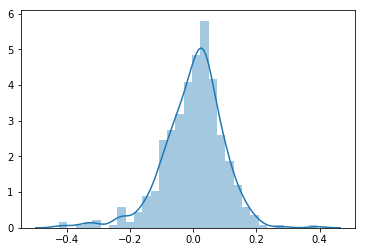

In [93]:
# Checking assumption whether the error terms are normally distributed or not
sns.distplot(res)

- From above we can visually observe that error terms are normally distributed across mean 0.

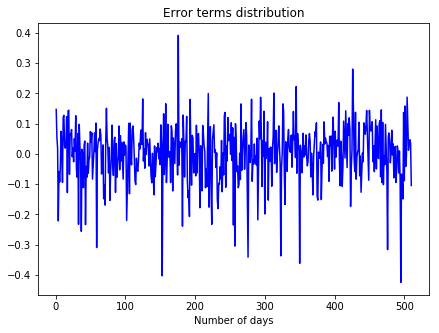

In [94]:
# checking the variation of error terms over days.
c = [i for i in range(1,X_train_rfe.shape[0]+1)]
plt.figure(figsize= (7,5))
plt.plot(c, res, color = 'blue')
plt.xlabel('Number of days')
plt.title('Error terms distribution')
plt.show()

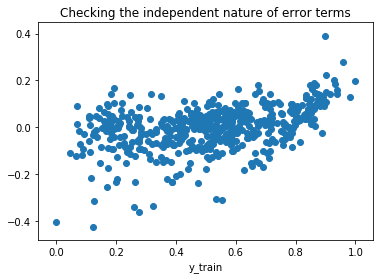

In [95]:
# checking the independent nature of error terms
plt.figure()
plt.scatter(y_train, res)
plt.xlabel('y_train')
plt.title('Checking the independent nature of error terms')
plt.show()

- From above plot we can see that there is no visible pattern present in the error terms. Which indicates that the model includes all the explanatory variables thereby leaving only the random error in error terms. Hence we can say that the error terms are independent of each other. Thereby statisfying one of the assumption of independent error terms.

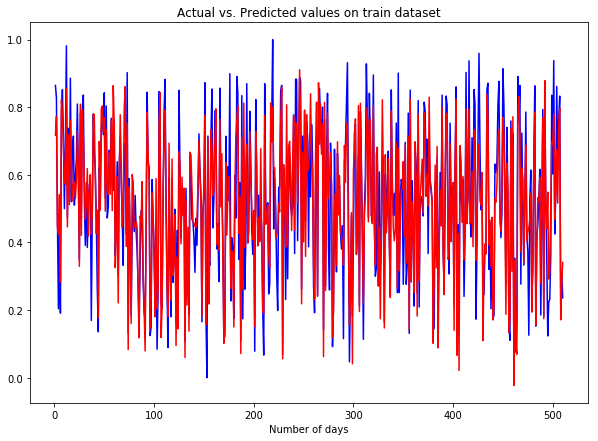

In [96]:
# Plotting actual and predicted values of train dataset
c = [i for i in range(1,X_train_rfe.shape[0]+1)]
plt.figure(figsize = (10,7))
plt.plot(c,y_train, color = 'blue')
plt.plot(c, y_train_pred, color = 'red')
plt.xlabel('Number of days')
plt.title('Actual vs. Predicted values on train dataset')
plt.show()

- From above we can see that for almost every datapoint the predictions made by the model on the train dataset are very much close to actual values of train dataset. Also we can see that the assunptions have been satisfied.<br><br> Let's make predictions on the test dataset as well and check the r square value of the test dataset as well.

## Making Predictions on test dataset

In [97]:
# analyzing the test dataset
df_test.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [98]:
# checking the numerical colunmns
numerical_columns_list

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [99]:
# Applying scaling on test dataframe
df_test[numerical_columns_list] = scaler.transform(df_test[numerical_columns_list])

In [100]:
# Reading the test dataframe after scaling
df_test.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,not_holiday,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [101]:
# Creating X_test and y_test variables using df_test
X_test = df_test[['temp', 'atemp', 'hum', 'windspeed','spring', 'summer','winter', '2019', 'not_holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul','Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'not_workingday','Light_Snow', 'Mist']]
y_test = df_test['cnt']

In [102]:
# analyzing X_test
X_test.head()

,temp,atemp,hum,windspeed,spring,summer,winter,2019,not_holiday,Aug,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,not_workingday,Light_Snow,Mist
184,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
535,0.901354,0.842587,0.610133,0.153728,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [103]:
# analyzing y_test
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [104]:
# making list of considered columns for modelling
considered_columns_model = list(X_train_rfe.columns)
considered_columns_model

['temp', 'spring', 'summer', 'winter', '2019', 'Sep', 'Light_Snow', 'Mist']

In [105]:
# adding constant to X_test for considered variables of modelling
X_test_sm = sm.add_constant(X_test[considered_columns_model])

In [106]:
# checking X_test_sm
X_test_sm.head()

,const,temp,spring,summer,winter,2019,Sep,Light_Snow,Mist
184,1.0,0.831783,0,0,0,0,0,0,1
535,1.0,0.901354,0,1,0,1,0,0,0
299,1.0,0.511964,0,0,1,0,0,0,1
221,1.0,0.881625,0,0,0,0,0,0,0
152,1.0,0.817246,0,1,0,0,0,0,0


In [107]:
# Making predictions on test dataset using model
y_test_pred = mlr_model_8.predict(X_test_sm)

In [108]:
# analyzing y_test_pred
y_test_pred.head()

184    0.471140
535    0.866666
299    0.408228
221    0.572315
152    0.591864
dtype: float64

#### Checking R square value for both train and test dataset

In [109]:
# checking the R square value for the test dataset
r2_value_test = r2_score(y_test, y_test_pred)
r2_value_test

0.8067958609090391

In [110]:
# checking the R square value for the train datset using model
r2_value_train = r2_score(y_train,y_train_pred)
r2_value_train

0.8168654184330812

- Upon comparing the R square values of test and train datasets using model we can see that there is no much difference in their values. Which is an indication that model was able to predict well on the test dataset as well. Which can further infer that there is no multicolinearity and overfitting issues in the model.

#### Checking Adjusted R square value for both train and test dataset

In [111]:
# Calculation of adjusted R square value for train dataset
adj_r2_score_train = 1- (((1-r2_value_train)*(X_train_rfe.shape[0]-1))/(X_train_rfe.shape[0]- len(considered_columns_model)-1))
adj_r2_score_train

0.813941113737402

In [112]:
# Calculation of adjusted R sqaure value for test dataset
adj_r2_score_test = 1- (((1-r2_value_test)*(X_test.shape[0]-1))/(X_test.shape[0]- len(considered_columns_model)-1))
adj_r2_score_test

0.7994357032293835

- From above two values we can see that the adjusted R square values are also very close to each other.

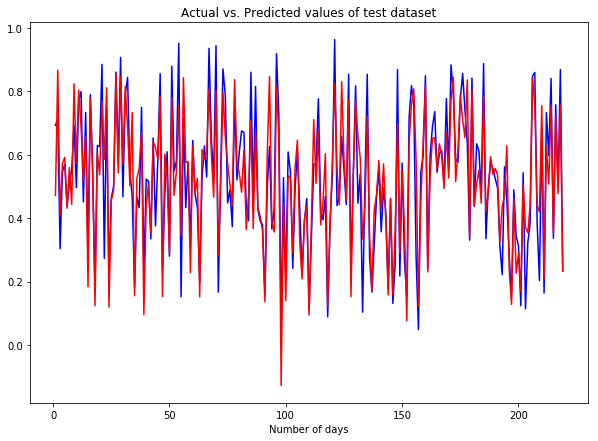

In [113]:
# Plotting y_test and y_test_pred
c = [i for i in range(1, X_test.shape[0]+1)]
plt.figure(figsize= (10,7))
plt.plot(c, y_test, color = 'blue')
plt.plot(c, y_test_pred,  color = 'red')
plt.xlabel('Number of days')
plt.title('Actual vs. Predicted values of test dataset')
plt.show()

- From above plot we can observe that the predicted values and actual values are very close to each other. Almost overlapping with each other. Although the model is unable to predict some extreme higher and lower values. But it is acceptable as the model is not creating any overfitting issues or multicolinearity issues. Hence the overall model can be considered as decent model.

## Report the Model

In [114]:
# analyzing the model summary statistics again
mlr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.09e-179
Time:                        12:45:05   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.030      4.690      0.000       0.081       0.197
temp           0.4915      0.035     14.228      0.000       0.424       0.559
spring        -0.0673      0.022     -3.095      0.002      -0.110      -0.025
summer         0.0512      0.015      3.452      0.001       0.022       0.080
winter         0.0943      0.017      5.391      0.000       0.060       0.129
2019           0.2335      0.009     26.951      0.000       0.216       0.250
Sep            0.0915      0.017      5.373      0.000       0.058       0.125
Light_Snow    -0.2967      0.026    -11.471      0.000      -0.348      -0.246
Mist          -0.0767      0.009     -8.335      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       73.851   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.495
Skew:                          -0.749   Prob(JB):                     1.05e-39
Kurtosis:                       5.490   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the best fitted plane of the model is :

cnt = 0.1390 + (0.4915* temp) - (0.0673 * spring) + (0.0512 * summer) + (0.0943 * winter) +(0.2335 * 2019) + (0.0915 * Sep) - (0.2967 * Light_Snow) - (0.0767 * Mist)

__Few interpetations can be made from the following equation:__
- For 1 unit increase in temp keeping other variables constant there has been increase in demand of bikes by ~0.5 times.
- Similarly we can infer the same for other variables.
- Variables which are significantly contributing in the demand of bikes are:
    - temp variable with coefficient value of 0.4915
    - 2019 variable with coefficient value of 0.2335
    - winter variable with coefficient value of 0.0943
- Also there are some negative coefficient variable which are to be taken into consideration as they affect the demand in bikes such variables are:
    - Light snow variable with coefficient value of -0.2967
    - Mist variable with coefficient value of -0.0767
    - Spring variable with coefficient value of -0.0673
- Both types of coefficient variables needed to be considered in order to increase the demand of bikes effectively.